# KC House Data - Module 1 Project

## The Goal

### Question #1. Reason for the aspect of this project

The apsect of this project is estimating the price of the house of the Kings County.
The stakeholder targets are the local home buyers and realortors.
Home buyers have certain needs for their housing, and already know what they're looking for.
The examples would be minimium number of the bedrooms, bathrooms, location, condition of the house and ect.
Realtors will be able to give estimates of the house price depends on the homebuyer's needs.



In [14]:
import pandas as pd                      #importing all the tools for developing regression model
import numpy as np
from matplotlib import pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

Since all the tools are ready to go, Let's create the dataframe by reading in the csv file and take a look.

In [15]:
df = pd.read_csv('kc_house_data.csv')  #reads the csv file
df.head()                              #quick peak at the data. It brings up first 5 columns.


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [16]:
df.info() #tells number of observed data within the file with the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Among the features, there're three different data types, integers, floats, and object.
To crunch numbers with python, object needs to be turned into numbers so that machine would understand it better.
Also, null values, Nan, or special caracters needs to be replaced with or dropped.

In [17]:
df.isna().sum() #looking for not a number within the features

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [18]:
df.date = pd.to_datetime(df['date'])          #changes object to datetime64 format.
df.sqft_basement = pd.to_numeric(df.sqft_basement) #changes object to float format.

print(df.info())

ValueError: Unable to parse string "?" at position 6

Looking at above error, it says that it's unable to change the sqft_basement into the 'float' because it contains '?' among the data. We have to do something about it. Let's see if there's anything else other than '?'Ca.

In [19]:
df.sqft_basement.unique() #Looking up all the unique data among the sqft_basement feature.

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

There's nothing really other than '?'

### Question #2. What to do with the Nan, Special characters, or missing data

What I'm going to do with the those missing or special characters that's not actual observed data is dropping them or replacing them with mean of the features, 0, or just leaving them blank. Replacing with a number would skew or change the data, ending up the result of the model. Dropping the data might not also be the best way to do because it will be less data to build the model on. Leaving it blank would be the best option, but my coding didn't really work after all, so I decided to replace them with zero after examining the data.

In [20]:
df.sqft_basement = df.sqft_basement.map(lambda x: 0 if x == '?' else x) # Replace '?' with 0s
df.sqft_basement = df.sqft_basement.astype('float')                     #Then change the data type from object to 'float'


In [21]:
df.waterfront.unique() #Let's take a look at waterfront unique values since it has 2376 missing values

array([nan,  0.,  1.])

In [22]:
df.loc[df.waterfront.isna(), 'waterfront'] = 0 #Replacing Nan with 0
df.waterfront.unique()                         #Let's make sure it is 0s and 1s

array([0., 1.])

View, and yr_renovated are still left with many 'na'values. 
Views can be just replaced with 0 because there' only 63 out of 21597 data. It's only small amount
Let's replace 'na' with zero.

In [23]:
df.loc[df.view.isna(), 'view'] = 0 #N/A to Zero

In [24]:
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0  #N/A to Zero for same reason
print(df.isna().sum())
df.info()                                          #Final check to see if there's Nan, Null and data types for features.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft

Now, There're all kinds of errors with the data set, It would be good idea to check for duplicate datas.
Duplicates skews the data so it's never good to have. Checking duplicates with ID would be the best way to get it done, becasue ID should ditinguish all the sell datas from each other.

In [25]:
duplicates = df[df.duplicated(subset='id')] #checking for duplicate datas with house sell ID
print(len(duplicates))                      #printing number of duplicate Sells


177


In [26]:
df = df.drop_duplicates(subset='id', keep='first')   #Keeping the first ID and dropping the duplicate ones
df.info()
print(df.keys())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.6

Data is cleaned, and ready to be crunched/played with.
Running OLS Multi regression model with Raw, not transforemd or scaled data to get some feel for it.
It will be run with the intercept to have better fit.

In [27]:
x=df

x_cols = sm.add_constant(x) # adding intercept

outcome = 'price'                                                       #target is the price, dependant variable
x_cols = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',            # Allthe features, independent variables
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',   # These features determines the change of the price.
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

predictors = '+'.join(x_cols)                                             
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     131.0
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:36:39   Log-Likelihood:            -2.9173e+05
No. Observations:               21420   AIC:                         5.842e+05
Df Residuals:                   21030   BIC:                         5.873e+05
Df Model:                         389                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 7.161e+06   2.96e+06      2.421      0.016    1.36e+06     1.3e+07
date[T.Timestamp('2014-05-03 00:00:00')]  1.759e+05   1.03e+05      1.702      0.089   -2.66e+04    3.78e+05
date[T.Timestamp('2014-05-04 00:00:00')]  -6.57e+04   9.31e+04     -0.706      0.480   -2.48e+05    1.17e+05
date[T.Timestamp('2014-05-05 00:00:00')]  1.644e+04   3.29e+04      0.500      0.617    -4.8e+04    8.09e+04
date[T.Timestamp('2014-05-06 00:00:00')]   -76.0774    3.3e+04     -0.002      0.998   -6.47e+04    6.46e+04
date[T.Timestamp('2014-05-07 00:00:00')]  1.447e+04   3.22e+04      0.450      0.653   -4.86e+04    7.75e+04
date[T.Timestamp('2014-05-08 00:00:00')]  4.854e+04   3.32e+04      1.464      0.143   -1.65e+04    1.14e+05
date[T.Timestamp('2014-05-09 00:00:00')] -1.487e+04   3.32e+04     -0.449      0.654   -7.99e+04    5.01e+04
date[T.Timestamp('2014-05-10 00:00:00')]  3.099e+04   9.31e+04      0.333      0.739   -1.51e+05    2.13e+05
date[T.Timestamp('2014-05-11 00:00:00')]   6.32e+04   1.44e+05      0.439      0.661   -2.19e+05    3.46e+05
date[T.Timestamp('2014-05-12 00:00:00')]  2.119e+04   3.33e+04      0.637      0.524    -4.4e+04    8.64e+04
date[T.Timestamp('2014-05-13 00:00:00')]  4.629e+04   3.27e+04      1.415      0.157   -1.79e+04     1.1e+05
date[T.Timestamp('2014-05-14 00:00:00')]  8205.3680   3.32e+04      0.248      0.805   -5.68e+04    7.32e+04
date[T.Timestamp('2014-05-15 00:00:00')]  7112.6525   3.31e+04      0.215      0.830   -5.77e+04    7.19e+04
date[T.Timestamp('2014-05-16 00:00:00')]  1478.6832    3.4e+04      0.044      0.965   -6.51e+04    6.81e+04
date[T.Timestamp('2014-05-17 00:00:00')]  8.321e+04   2.02e+05      0.411      0.681   -3.13e+05     4.8e+05
date[T.Timestamp('2014-05-18 00:00:00')]  1.914e+04   7.97e+04      0.240      0.810   -1.37e+05    1.75e+05
date[T.Timestamp('2014-05-19 00:00:00')]  1.399e+04    3.3e+04      0.424      0.671   -5.07e+04    7.86e+04
date[T.Timestamp('2014-05-20 00:00:00')]  1.362e+04   3.08e+04      0.442      0.658   -4.68e+04     7.4e+04
date[T.Timestamp('2014-05-21 00:00:00')]  9835.5938   3.21e+04      0.306      0.759   -5.31e+04    7.28e+04
date[T.Timestamp('2014-05-22 00:00:00')]  1.087e+04   3.23e+04      0.336      0.737   -5.25e+04    7.42e+04
date[T.Timestamp('2014-05-23 00:00:00')]  1.246e+04   3.29e+04      0.379      0.705    -5.2e+04    7.69e+04
date[T.Timestamp('2014-05-24 00:00:00')]  5.715e+04   6.53e+04      0.875      0.382   -7.09e+04    1.85e+05
date[T.Timestamp('2014-05-25 00:00:00')] -8.889e+04   9.31e+04     -0.955      0.340   -2.71e+05    9.35e+04
date[T.Timestamp('2014-05-26 00:00:00')] -1.635e+04   7.51e+04     -0.218      0.828   -1.64e+05    1.31e+05
date[T.Timestamp('2014-05-27 00

R sqaured value with 70.8%, Fstatic value with 131. 
Most of the P values for the 'date' feature is pretty high. I will choose to drop the date feature.
The Kaggel data set mentioned that the observations from 2014 & 2015. Date shouldn't have huge effect on the target.
Also, Id doesn't help either so it will also be dropped.

In [28]:
df.drop(['date'], axis=1, inplace=True) #dropping two features that doesn't help other than adding #s to R squred value.
df.drop(['id'], axis=1, inplace=True)

Let's change the all the data value to the integers. It would look more clean.

In [29]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 19 columns):
price            21420 non-null int32
bedrooms         21420 non-null int32
bathrooms        21420 non-null int32
sqft_living      21420 non-null int32
sqft_lot         21420 non-null int32
floors           21420 non-null int32
waterfront       21420 non-null int32
view             21420 non-null int32
condition        21420 non-null int32
grade            21420 non-null int32
sqft_above       21420 non-null int32
sqft_basement    21420 non-null int32
yr_built         21420 non-null int32
yr_renovated     21420 non-null int32
zipcode          21420 non-null int32
lat              21420 non-null int32
long             21420 non-null int32
sqft_living15    21420 non-null int32
sqft_lot15       21420 non-null int32
dtypes: int32(19)
memory usage: 1.7 MB


Let's see how dropping 'date' and 'id' column effected the over OLS model.

In [30]:
x=df

x_cols = sm.add_constant(x)

outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2411.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:37:13   Log-Likelihood:            -2.9344e+05
No. Observations:               21420   AIC:                         5.869e+05
Df Residuals:                   21402   BIC:                         5.871e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2436.3362   1430.376      1.703      0.089    -367.308    5239.981
bedrooms      -3.949e+04   2030.070    -19.451      0.000   -4.35e+04   -3.55e+04
bathrooms      5.465e+04   3116.415     17.536      0.000    4.85e+04    6.08e+04
sqft_living     109.0840     19.318      5.647      0.000      71.218     146.950
sqft_lot          0.0020      0.051      0.040      0.968      -0.098       0.103
floors         2.403e+04   3900.789      6.160      0.000    1.64e+04    3.17e+04
waterfront     6.106e+05   1.94e+04     31.407      0.000    5.73e+05    6.49e+05
view           4.405e+04   2268.427     19.420      0.000    3.96e+04    4.85e+04
condition      2.116e+04   2525.036      8.379      0.000    1.62e+04    2.61e+04
grade          1.205e+05   2271.403     53.064      0.000    1.16e+05    1.25e+05
sqft_above       50.5596     19.313      2.618      0.009      12.704      88.415
sqft_basement    56.0021     19.181      2.920      0.004      18.406      93.598
yr_built      -3535.3076     74.449    -47.487      0.000   -3681.232   -3389.383
yr_renovated     14.3000      4.262      3.355      0.001       5.946      22.654
zipcode         -34.0549     31.622     -1.077      0.282     -96.037      27.927
lat            1.145e+05   6.72e+04      1.703      0.089   -1.73e+04    2.46e+05
long          -3.345e+04   6219.924     -5.378      0.000   -4.56e+04   -2.13e+04
sqft_living15    25.3647      3.652      6.946      0.000      18.207      32.523
sqft_lot15       -0.5008      0.079     -6.344      0.000      -0.656      -0.346
==============================================================================
Omnibus:                    15933.636   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1122481.328
Skew:                           2.966   Prob(JB):                         0.00
Kurtosis:                      37.964   Cond. No.                     5.54e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.07e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

'lat', 'sqft_lot' has high p-value but it might be different once we transform or scale the data, so let's leave it for now.
Since the data cleaning is done, let's save the cleaned data into the picke so that it will be easier to create the duplicate cleaned data later on to test different methods to see what perfroms better for building the regression model.

In [31]:
import pickle                                            #pick
with open ('data.pickle', 'wb') as clean_df:
    pickle.dump(df, clean_df, pickle.HIGHEST_PROTOCOL)

with open('data.pickle', 'rb') as clean_df:
    df1 = pickle.load(clean_df)

    
df1.info()
print(df1.keys())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 19 columns):
price            21420 non-null int32
bedrooms         21420 non-null int32
bathrooms        21420 non-null int32
sqft_living      21420 non-null int32
sqft_lot         21420 non-null int32
floors           21420 non-null int32
waterfront       21420 non-null int32
view             21420 non-null int32
condition        21420 non-null int32
grade            21420 non-null int32
sqft_above       21420 non-null int32
sqft_basement    21420 non-null int32
yr_built         21420 non-null int32
yr_renovated     21420 non-null int32
zipcode          21420 non-null int32
lat              21420 non-null int32
long             21420 non-null int32
sqft_living15    21420 non-null int32
sqft_lot15       21420 non-null int32
dtypes: int32(19)
memory usage: 1.7 MB
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', '

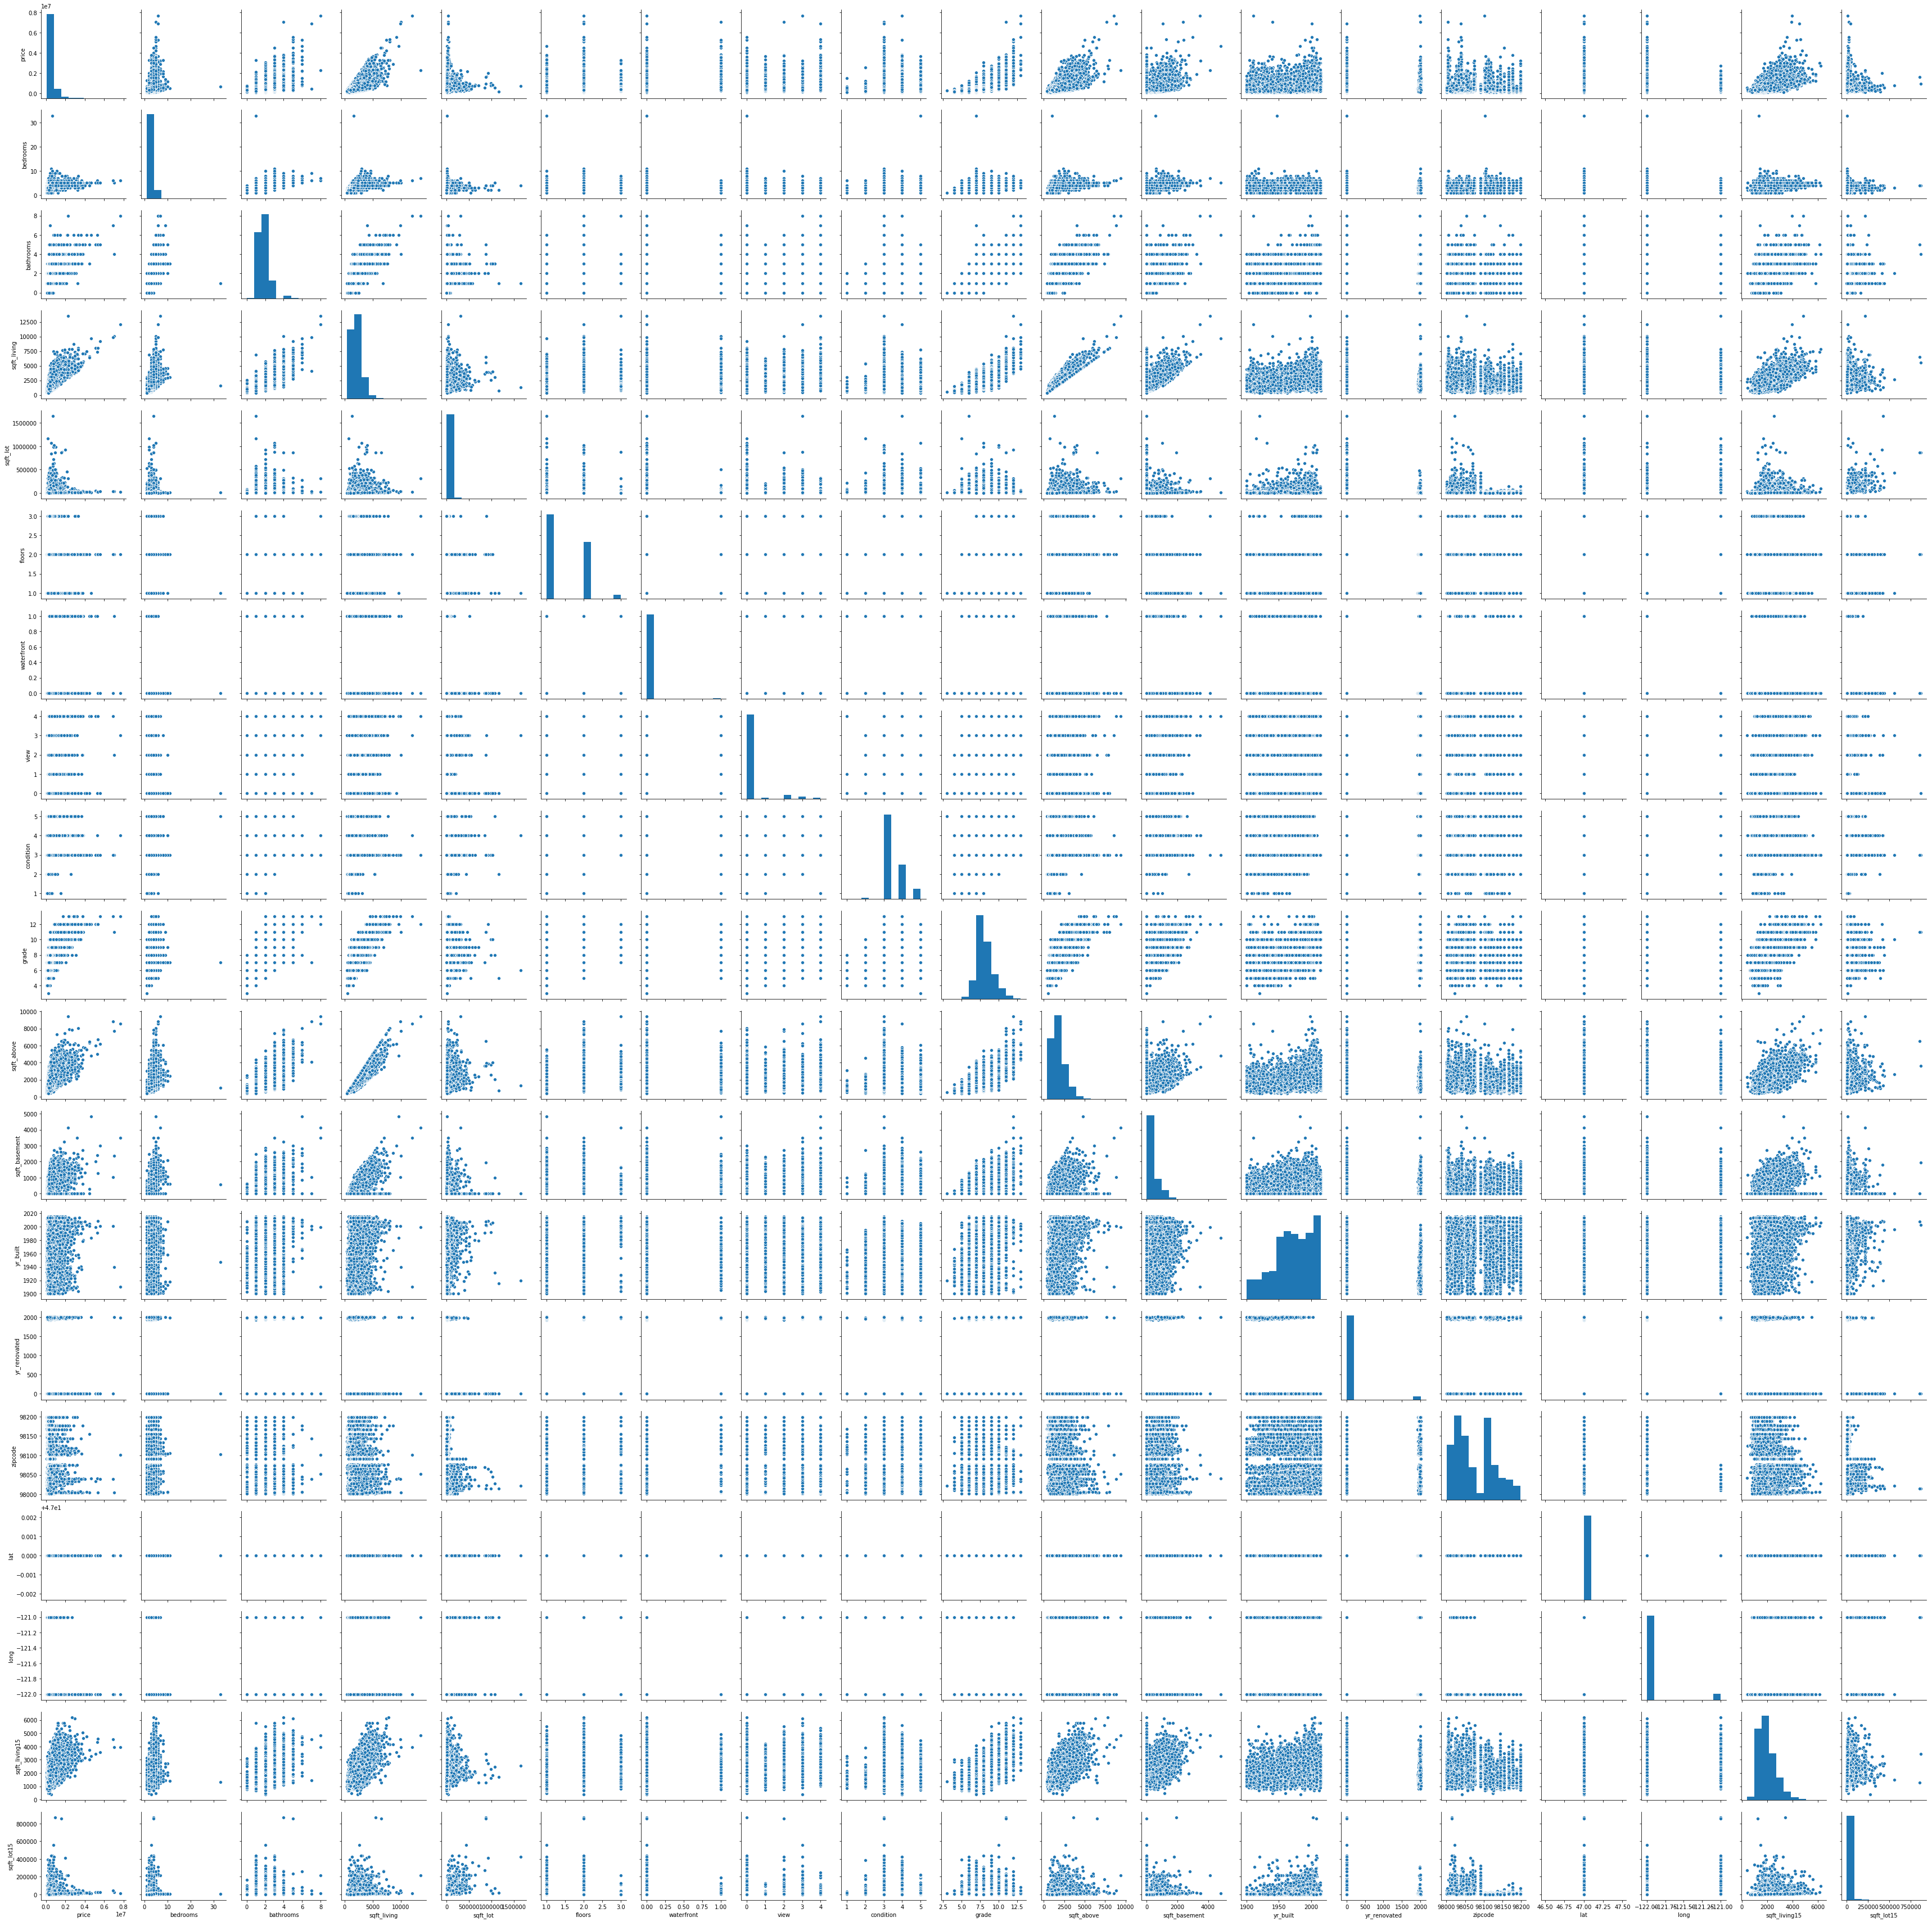

In [32]:
sns.pairplot(df);

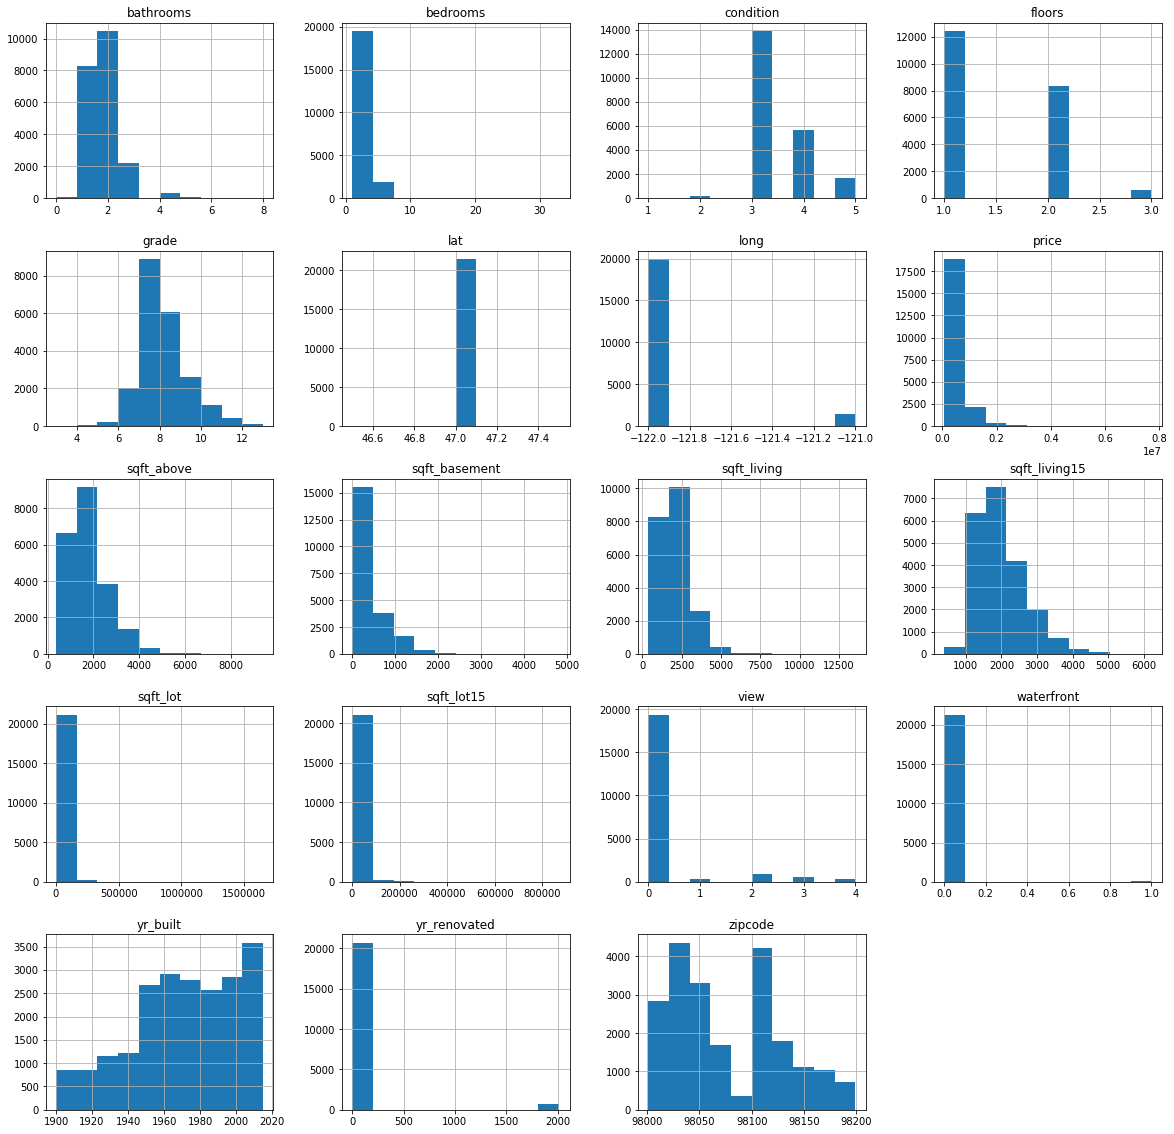

In [34]:
df.hist(figsize=(20,20));

In [72]:
df1.price = ( df1.price - min(df1.price) ) / ( max(df1.price) - min(df1.price) )

logbasement = np.log(df['sqft_basement'])


df1.sqft_living, _ = stats.boxcox(df1.sqft_living)
df1.sqft_lot, _ = stats.boxcox(df1.sqft_lot)
df1.sqft_above, _ = stats.boxcox(df1.sqft_above)
df1.sqft_living15, _ = stats.boxcox(df1.sqft_living15)
df1.sqft_lot15, _ = stats.boxcox(df1.sqft_lot15)
df1.condition, _ = stats.boxcox(df1.condition)
df1.floors, _ = stats.boxcox(df1.floors)
df1.grade, _ = stats.boxcox(df1.grade)


C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


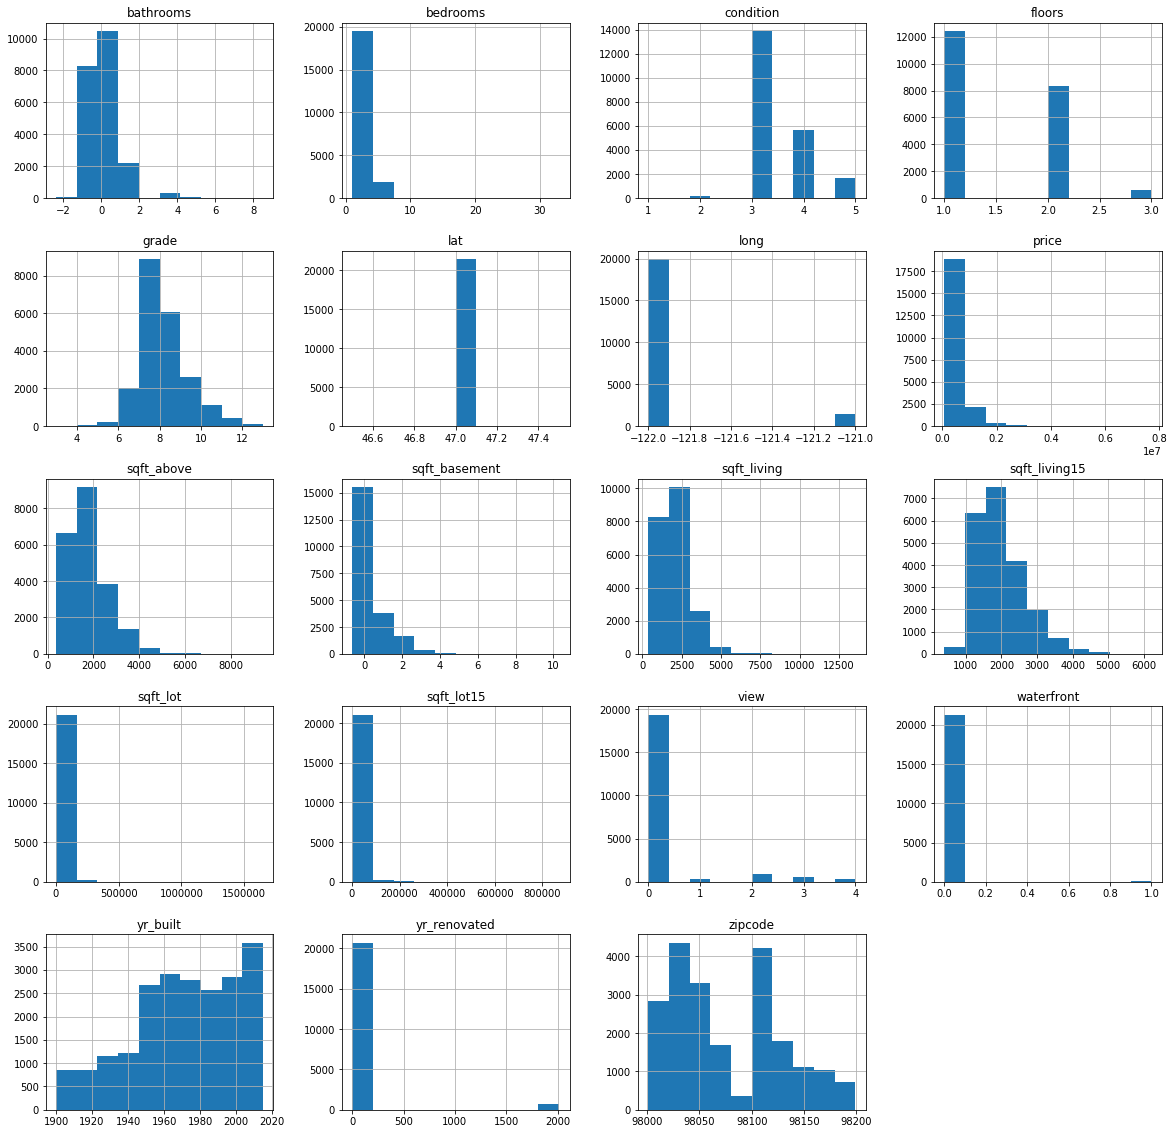

In [35]:
#for col in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       #'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       #'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       #'sqft_living15', 'sqft_lot15']:
       # df1[col] = (df1[col].price-min(df1[col].price))/(max(df1[col.price]) - min(df1[col].price))




#logbedrooms = np.log(df['bedrooms'])
logbathrooms = np.log(df['bathrooms'])
logbasement = np.log(df['sqft_basement'])


#df.sqft_basement, _ = stats.boxcox(df.sqft_basement)
#df.bedrooms, _ = stats.boxcox(df.bedrooms)
#df.bathrooms, _ = stats.boxcox(df.bathrooms)
#df.sqft_living, _ = stats.boxcox(df.sqft_living)
#df.sqft_lot, _ = stats.boxcox(df.sqft_lot)
#df.sqft_above, _ = stats.boxcox(df.sqft_above)
#df.sqft_living15, _ = stats.boxcox(df.sqft_living15)
#df.sqft_lot15, _ = stats.boxcox(df.sqft_lot15)
#df.condition, _ = stats.boxcox(df.condition)
#df.floors, _ = stats.boxcox(df.floors)
#df.grade, _ = stats.boxcox(df.grade)


#df.bedrooms = (df.bedrooms-np.mean(df.bedrooms))/np.sqrt(np.var(df.bedrooms))
df.bathrooms = (df.bathrooms-np.mean(df.bathrooms))/np.sqrt(np.var(df.bathrooms))
df.sqft_basement = (df.sqft_basement-np.mean(df.sqft_basement))/np.sqrt(np.var(df.sqft_basement))








#df.bedrooms = ( df.bedrooms - min(df1.bedrooms) ) / ( max(df.bedrooms) - min(df.bedrooms) )
#df.bathrooms = ( df.bathrooms - min(df.bathrooms) ) / ( max(df.bathrooms) - min(df.bathrooms) )
#df.sqft_living, _ = stats.boxcox(df.sqft_living)
#df.sqft_lot, _ = stats.boxcox(df.sqft_lot)
#df.sqft_above, _ = stats.boxcox(df.sqft_above)
#df.sqft_basement = ( df.sqft_basement - min(df.sqft_basement) ) / ( max(df.sqft_basement) - min(df.sqft_basement) )
#df.sqft_living15, _ = stats.boxcox(df.sqft_living15)
#df.sqft_lot15, _ = stats.boxcox(df.sqft_lot15)
#df.condition = ( df.condition - min(df.condition) ) / ( max(df.condition) - min(df.condition) )
#df.floors = ( df.floors - min(df.floors) ) / ( max(df.floors) - min(df.floors) )
#df.grade, _ = stats.boxcox(df.grade)


df.hist(figsize=(20,20));

In [36]:
for col in ['view', 'waterfront','yr_built','zipcode']:
    df[col] = df1[col].astype('category')

waterfront = pd.get_dummies(df.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(df.view, prefix='view', drop_first=True)
zipcode = pd.get_dummies(df.zipcode, prefix='zipcode', drop_first=True)
yr_built = pd.get_dummies(df.yr_built, prefix='yr_built', drop_first=True)

df = df.drop(['view', 'waterfront','yr_built','zipcode'], axis=1)
df = pd.concat([df, waterfront, view, yr_built], axis=1)

df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900         3  -1.025362         1180      5650       1          3   
1  538000         3   0.337038         2570      7242       2          3   
2  180000         2  -1.025362          770     10000       1          3   
3  604000         4   1.699439         1960      5000       1          5   
4  510000         3   0.337038         1680      8080       1          3   

   grade  sqft_above  sqft_basement      ...        yr_built_2006  \
0      7        1180      -0.649786      ...                    0   
1      7        2170       0.259310      ...                    0   
2      6         770      -0.649786      ...                    0   
3      7        1050       1.418406      ...                    0   
4      8        1680      -0.649786      ...                    0   

   yr_built_2007  yr_built_2008  yr_built_2009  yr_built_2010  yr_built_2011  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   yr_built_2012  yr_built_2013  yr_built_2014  yr_built_2015  
0              0              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 135 columns]

In [37]:

segments = 10
bins = list(np.linspace(df.long.min(), df.long.max(), num=segments))
labels = [i for i in range(1,segments)]

# Hot encoding to latitude
df.lat = pd.cut(df.lat, bins, labels=labels)
df.lat = df.lat.astype('category')
lat = pd.get_dummies(df.lat,prefix='lat', drop_first=True)

# Hot encoding to longtitude
df.long = pd.cut(df.long, bins, labels=labels)
df.long = df.long.astype('category')
long = pd.get_dummies(df.long,prefix='long', drop_first=True)

# Adding dummies to dataset, removing original `lat` and `long` features
df = df.join([lat, long])
df.drop(['lat','long'], axis=1, inplace=True)

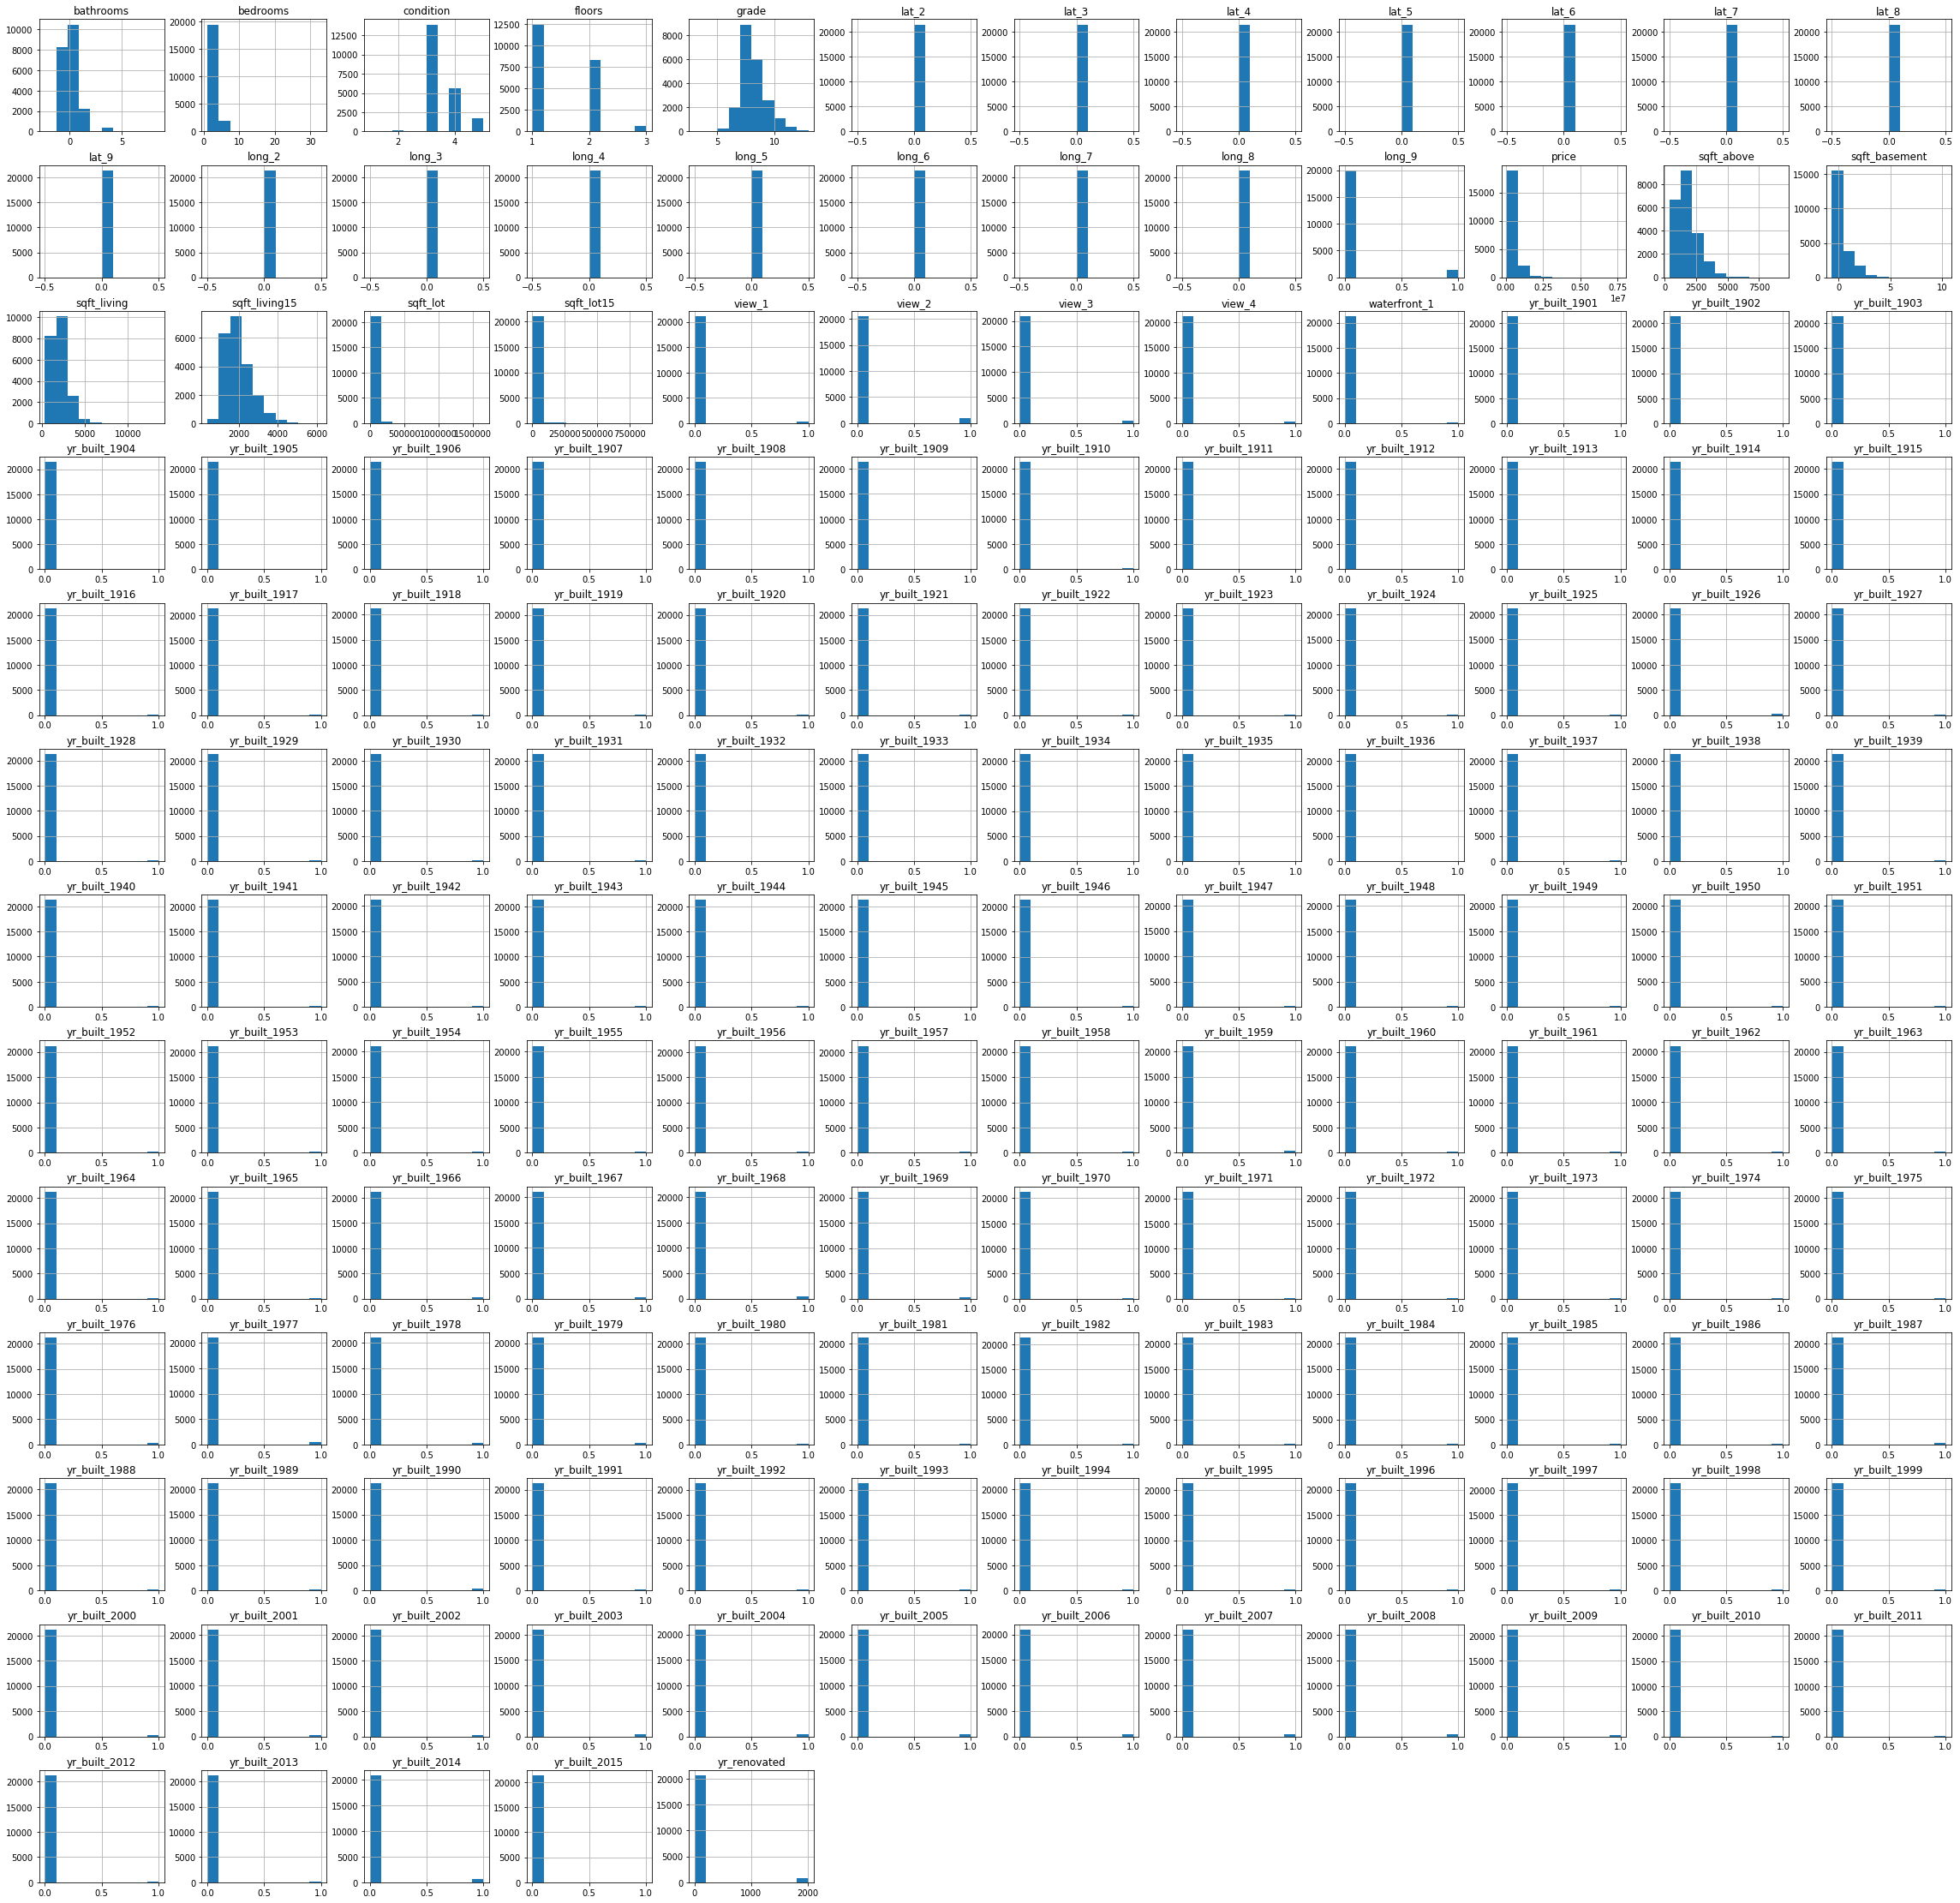

In [38]:
df.hist(figsize=(40,40));

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~bedrooms
-------------------------------------------------------------------------------------


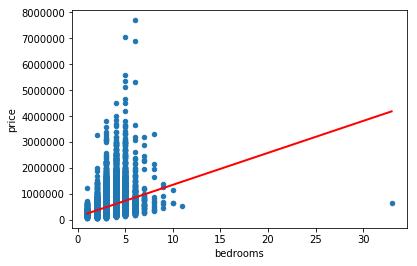

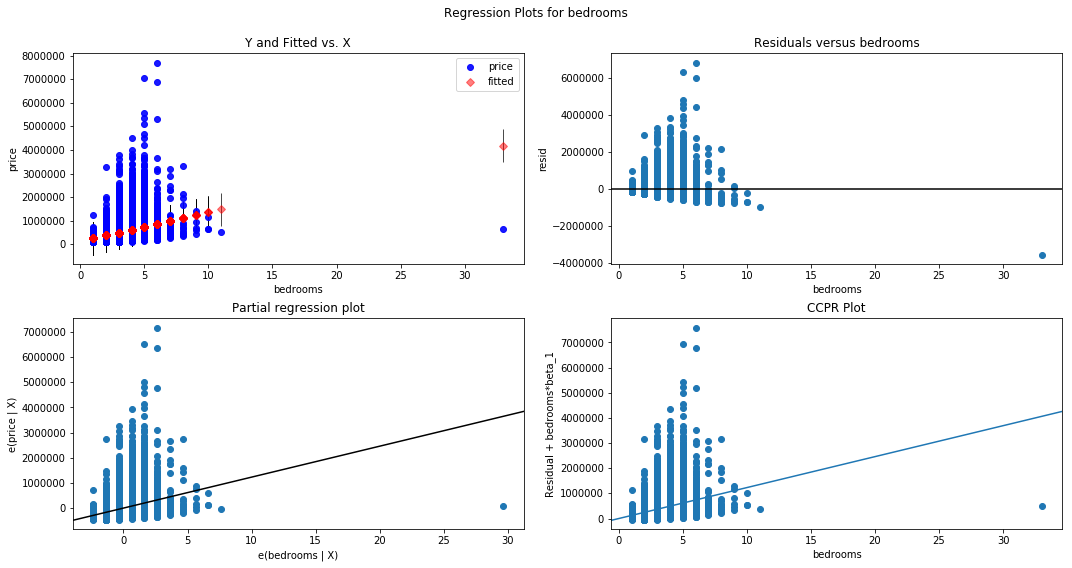

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~bathrooms
-------------------------------------------------------------------------------------


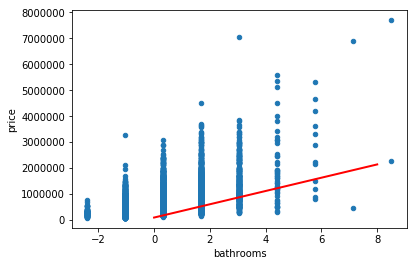

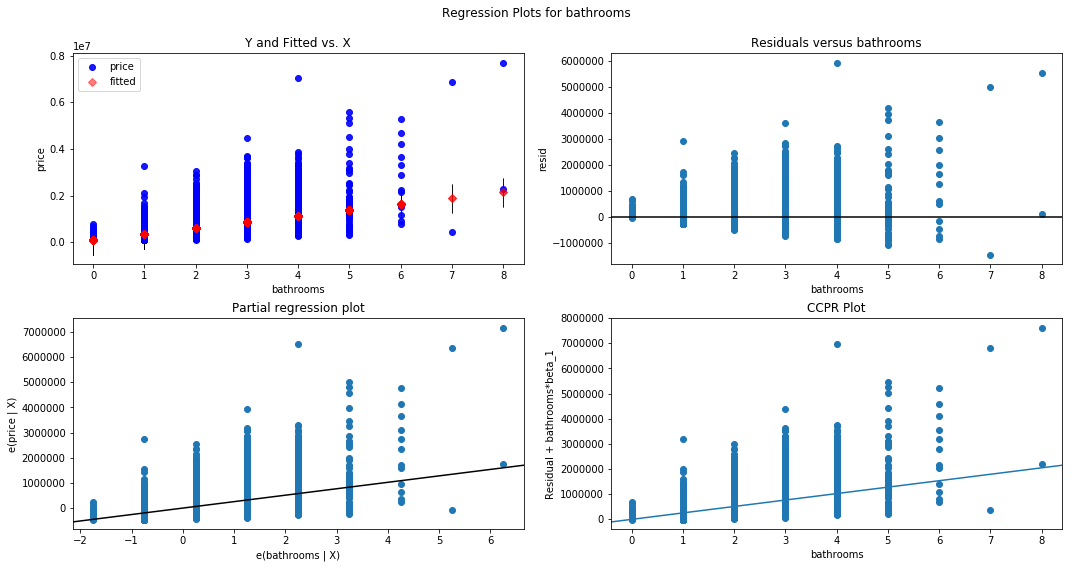

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_living
-------------------------------------------------------------------------------------


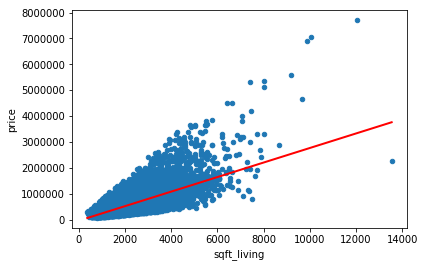

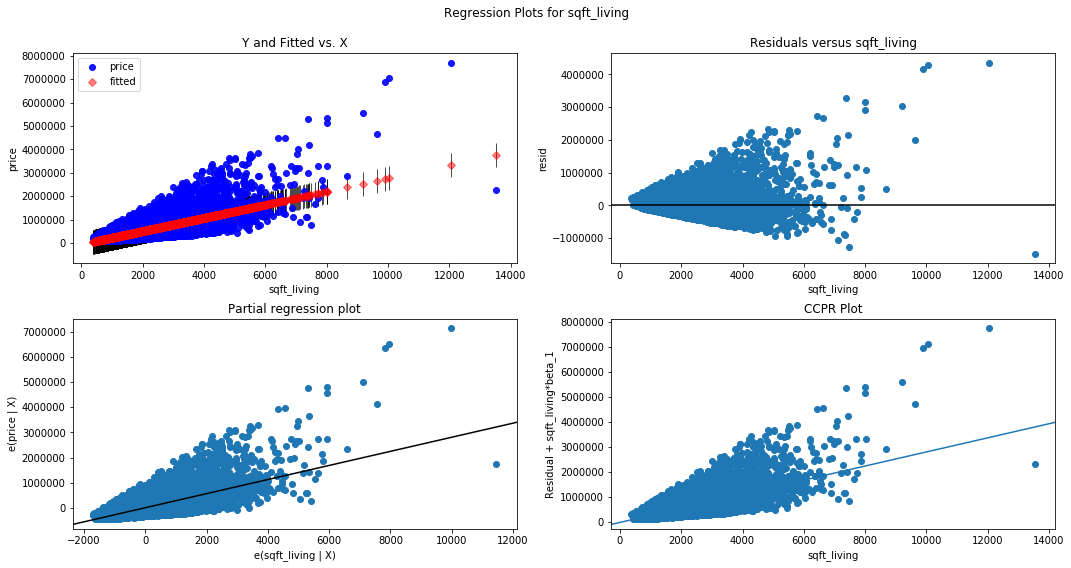

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_lot
-------------------------------------------------------------------------------------


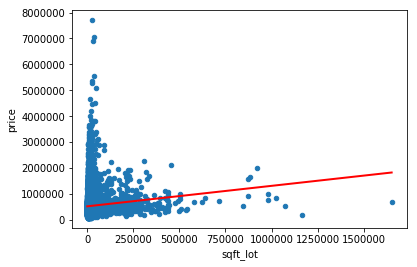

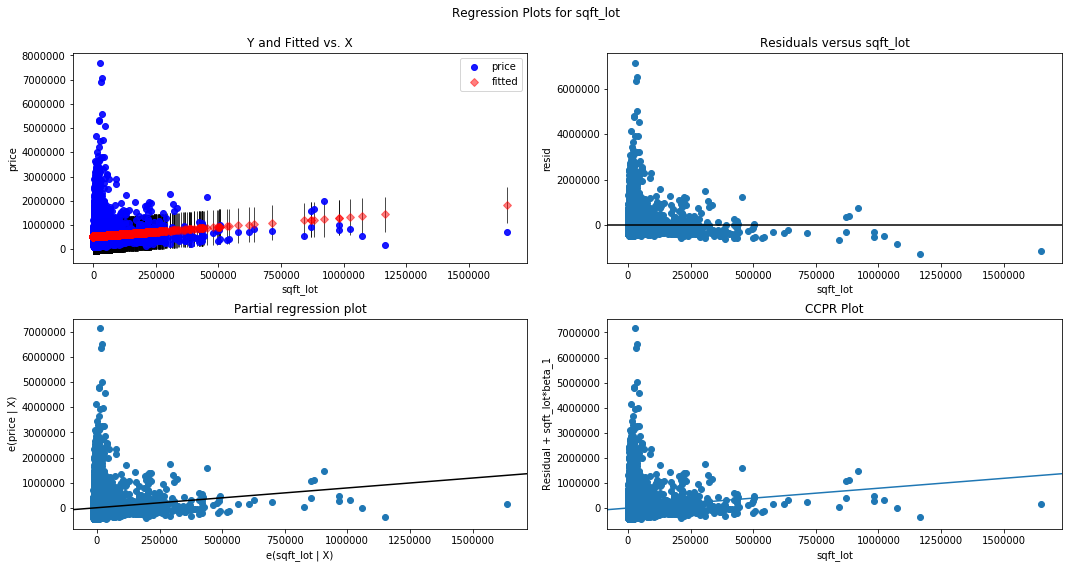

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~floors
-------------------------------------------------------------------------------------


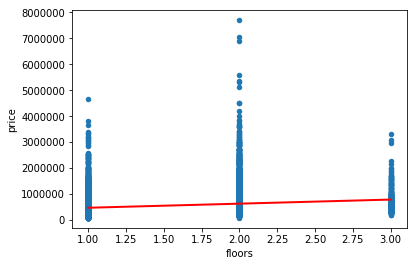

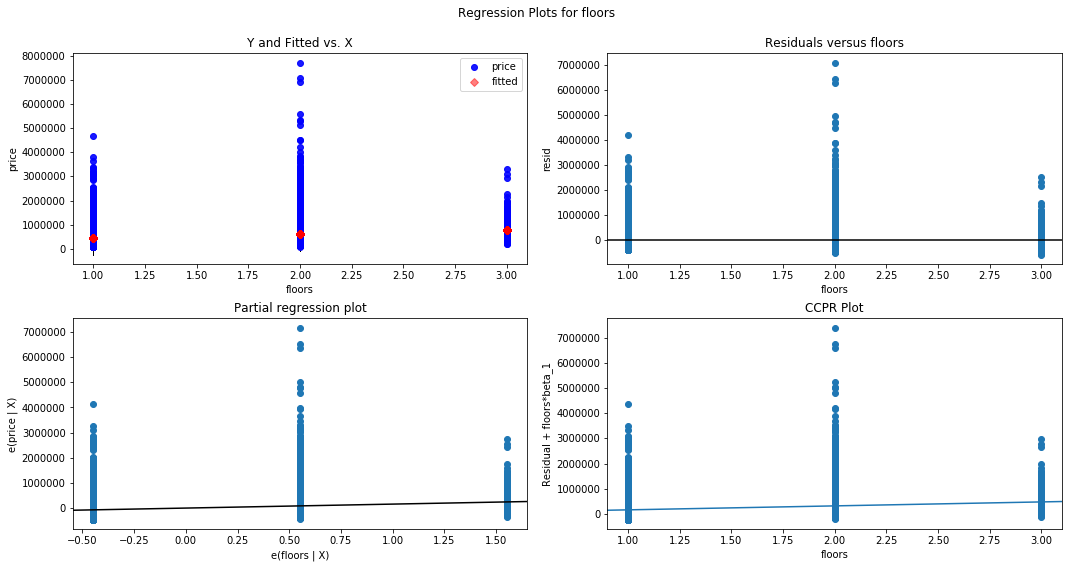

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~condition
-------------------------------------------------------------------------------------


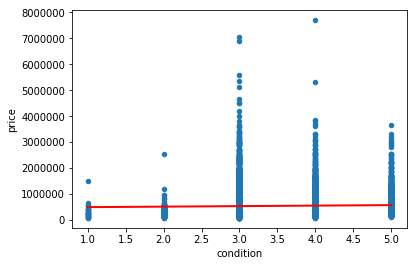

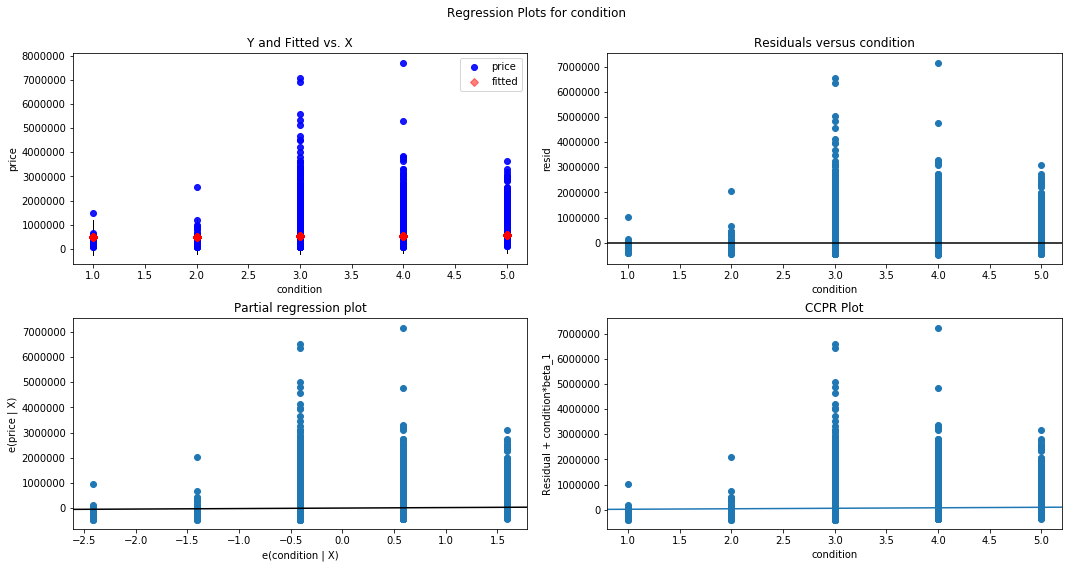

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~grade
-------------------------------------------------------------------------------------


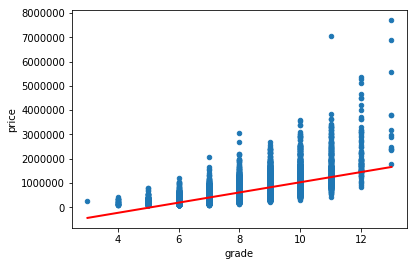

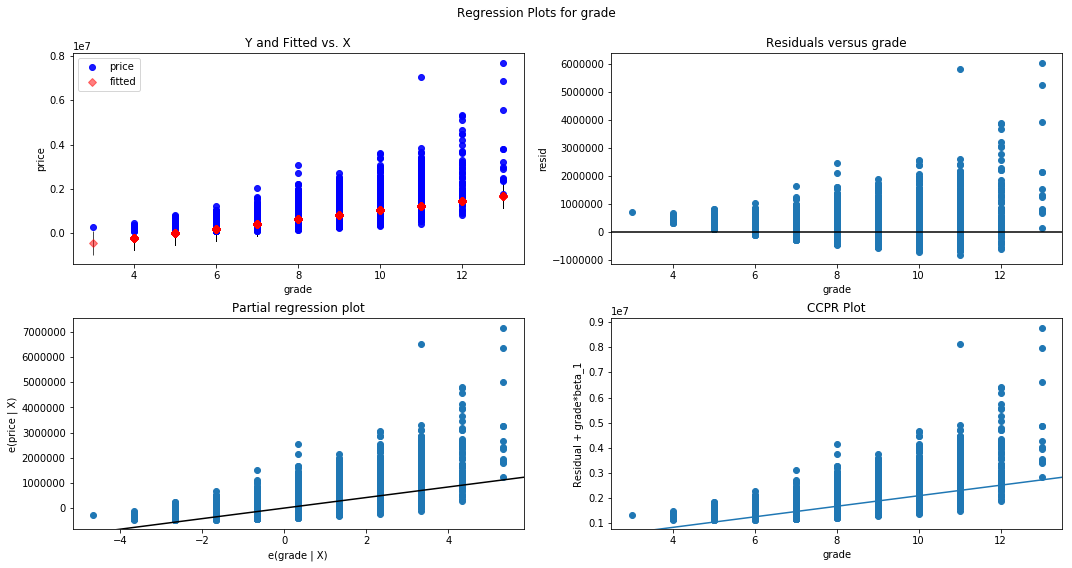

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_above
-------------------------------------------------------------------------------------


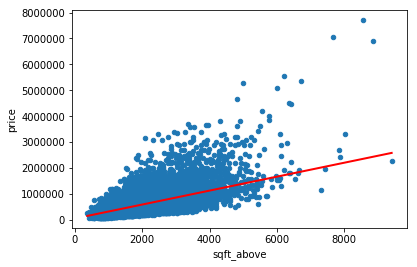

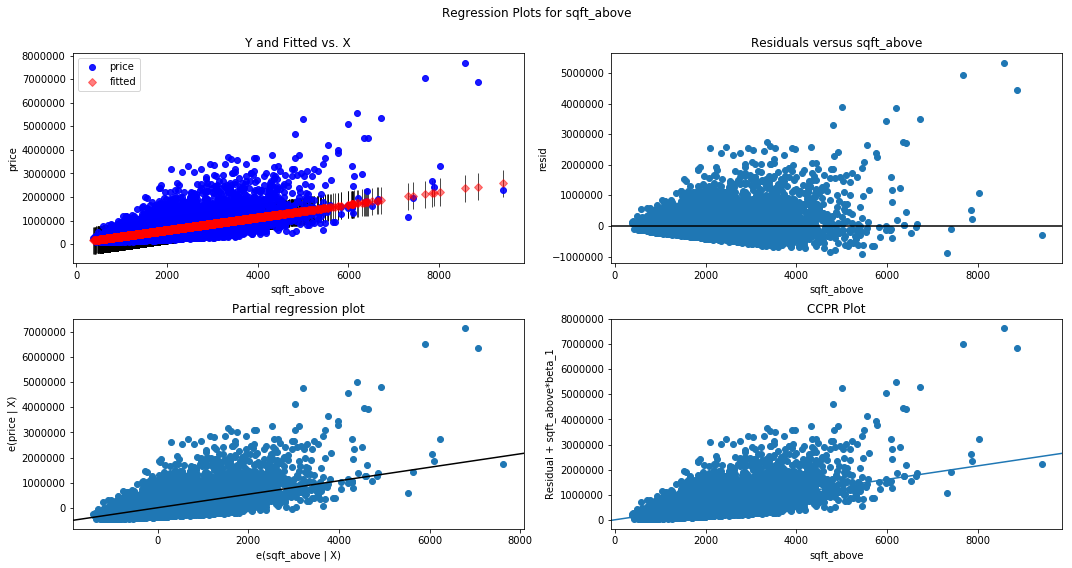

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_basement
-------------------------------------------------------------------------------------


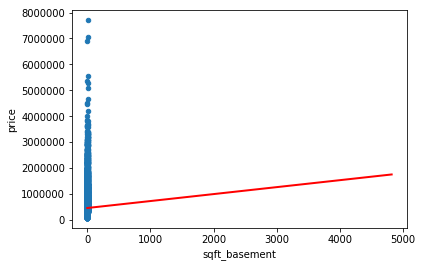

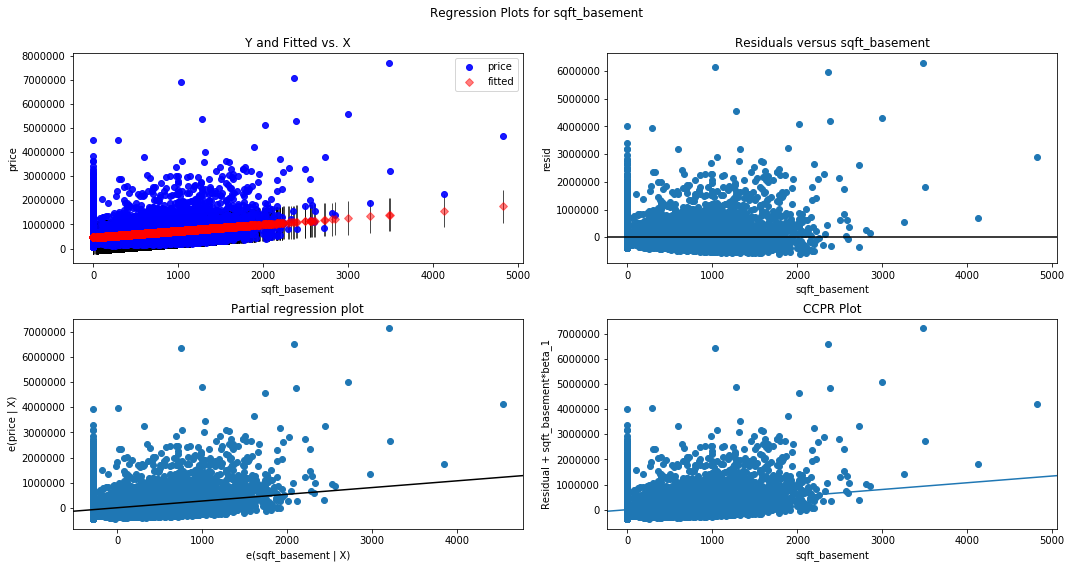

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~yr_renovated
-------------------------------------------------------------------------------------


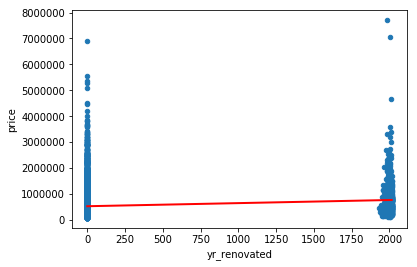

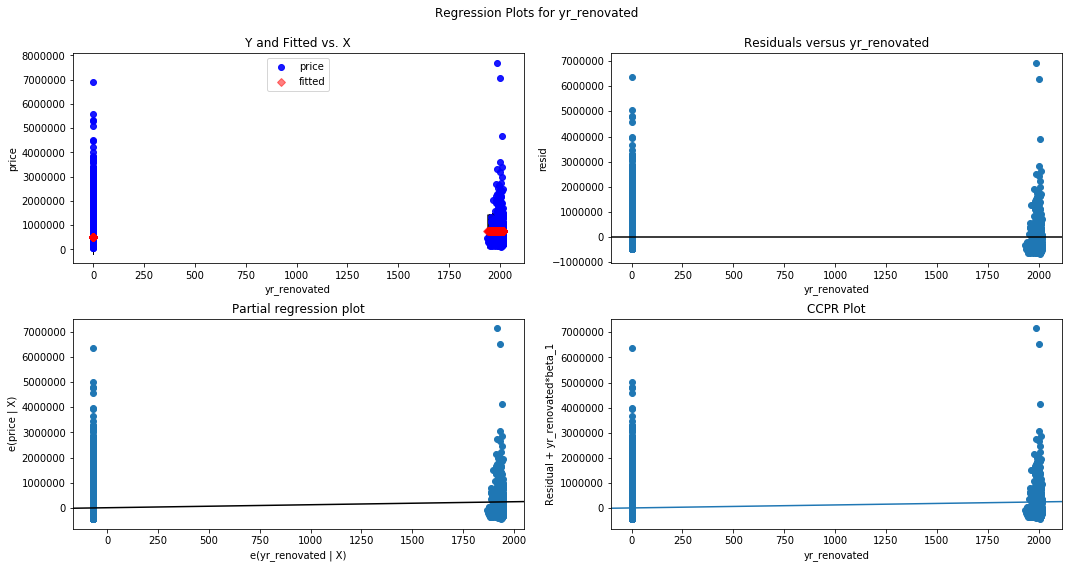

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_living15
-------------------------------------------------------------------------------------


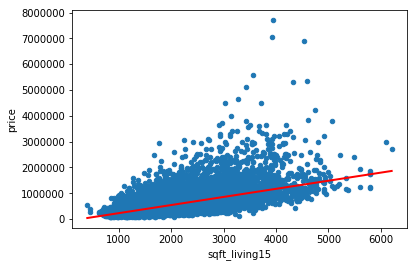

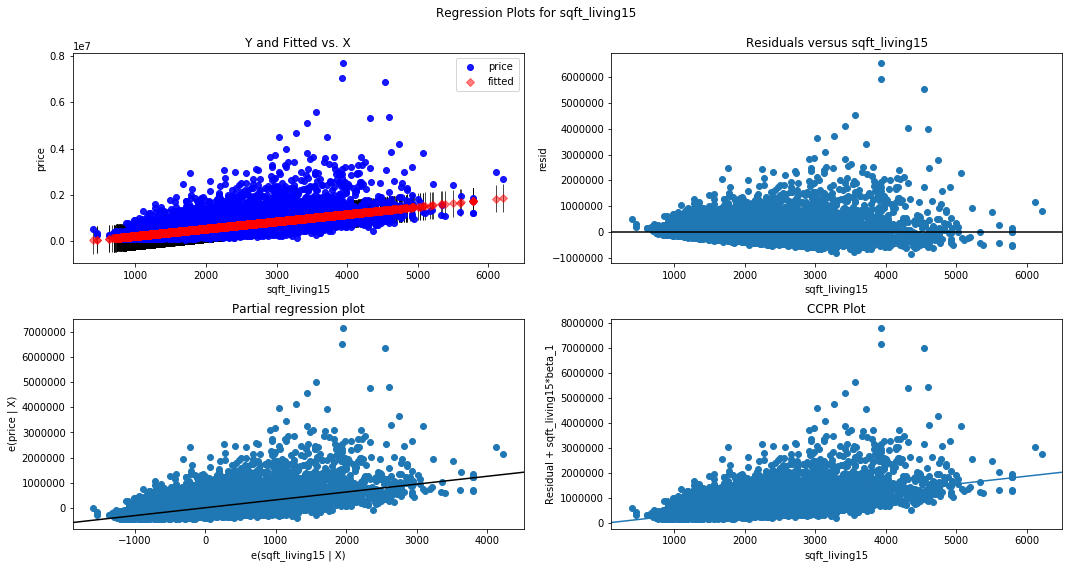

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_lot15
-------------------------------------------------------------------------------------


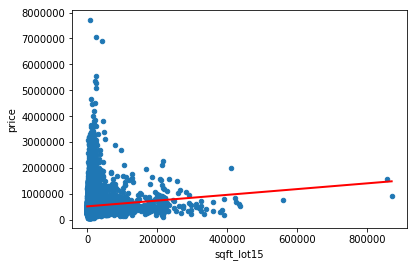

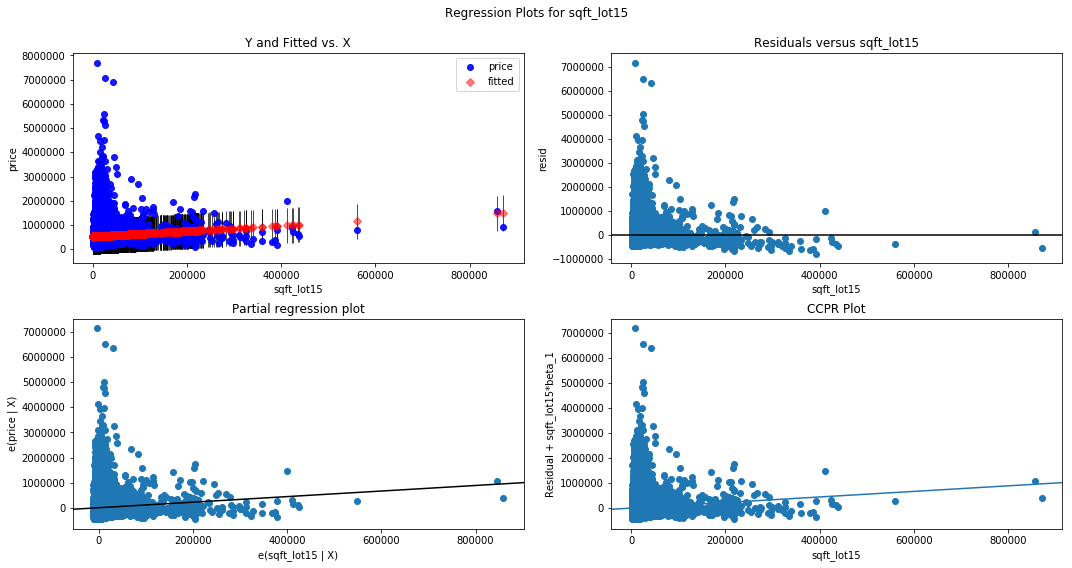

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']):
    print ("KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price' + '~'+ val
#   
    model = smf.ols(formula=f, data=df1).fit()
    
    X_new = pd.DataFrame({val: [df1[val].min(), df1[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    #input("Press Enter to continue...")

bedrooms QQ-plot
bathrooms QQ-plot
sqft_living QQ-plot
sqft_lot QQ-plot
floors QQ-plot
waterfront QQ-plot
view QQ-plot
condition QQ-plot
grade QQ-plot
sqft_above QQ-plot
sqft_basement QQ-plot
yr_built QQ-plot
yr_renovated QQ-plot
zipcode QQ-plot
lat QQ-plot
long QQ-plot
sqft_living15 QQ-plot
sqft_lot15 QQ-plot


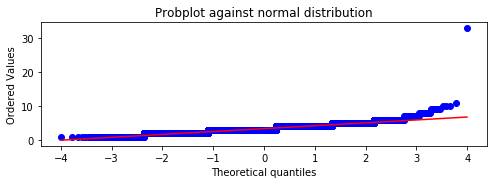

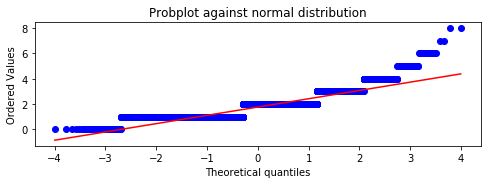

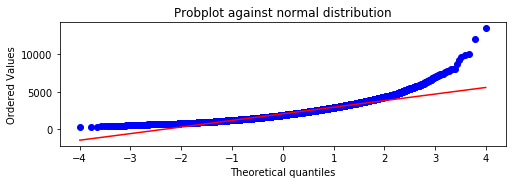

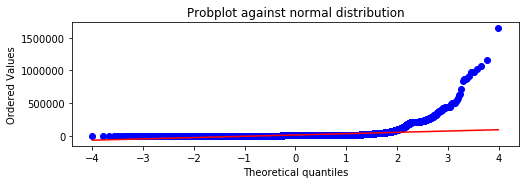

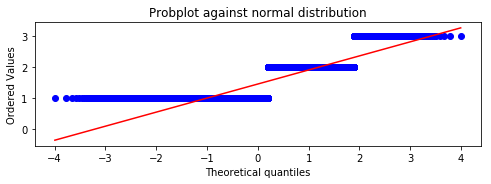

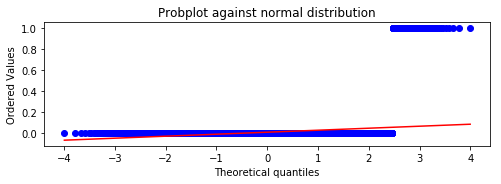

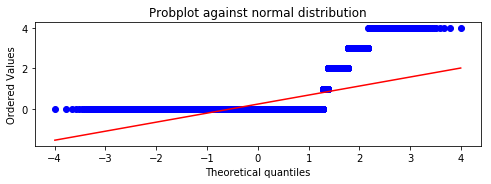

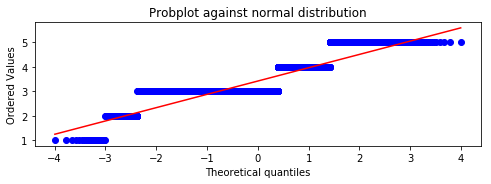

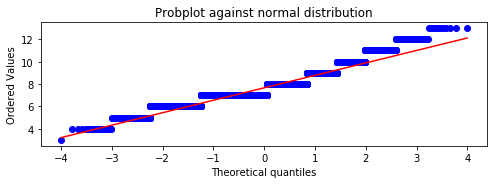

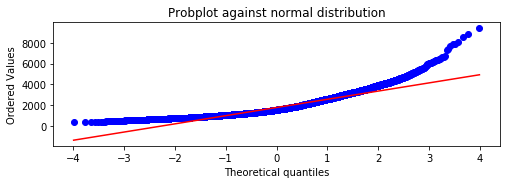

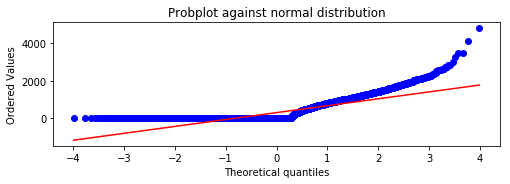

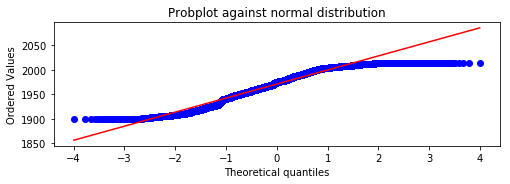

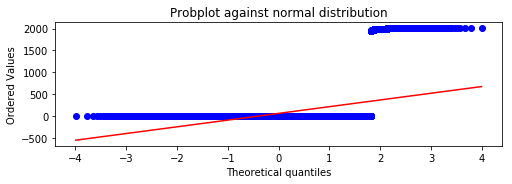

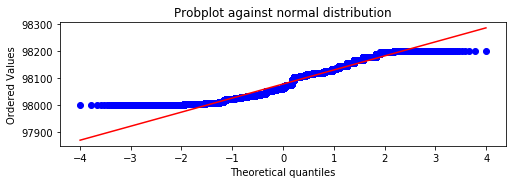

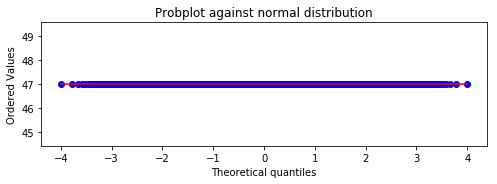

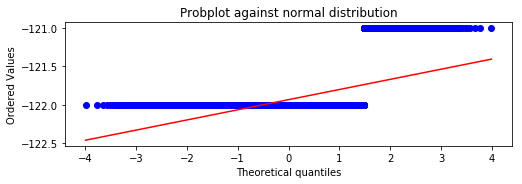

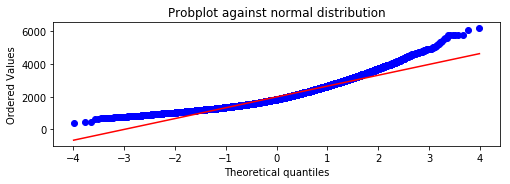

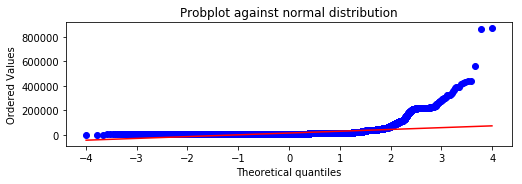

In [40]:
from scipy import stats

for x in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    print(x, 'QQ-plot')
    fig = plt.figure(figsize=(8, 5))
    ax1 = fig.add_subplot(211)
    x = df1[x]
    prob = stats.probplot(x, dist=stats.norm, plot=ax1)
    ax1.set_title('Probplot against normal distribution')


In [88]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [92]:


df_features = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']



X = df_features
y = pd.DataFrame(df.price)

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)


AttributeError: 'DataFrame' object has no attribute 'price'

bedrooms QQ-plot
bathrooms QQ-plot
sqft_living QQ-plot
sqft_lot QQ-plot
floors QQ-plot
waterfront QQ-plot
view QQ-plot
condition QQ-plot
grade QQ-plot
sqft_above QQ-plot
sqft_basement QQ-plot
yr_built QQ-plot
yr_renovated QQ-plot
zipcode QQ-plot
lat QQ-plot
long QQ-plot
sqft_living15 QQ-plot
sqft_lot15 QQ-plot


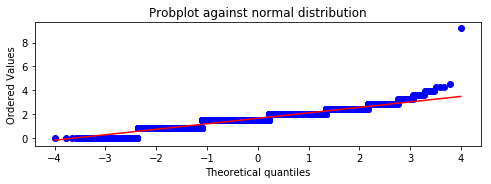

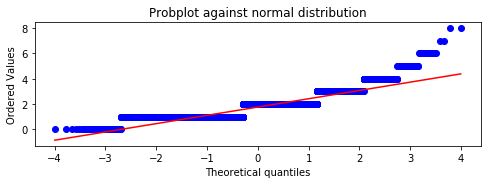

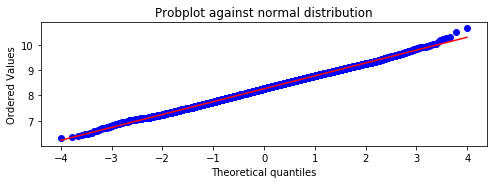

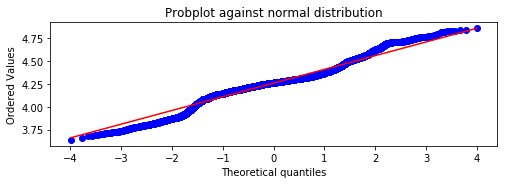

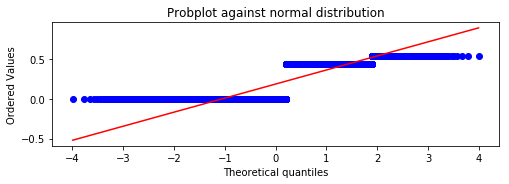

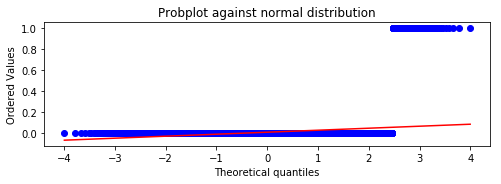

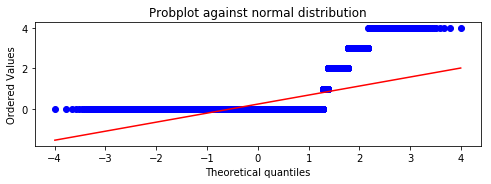

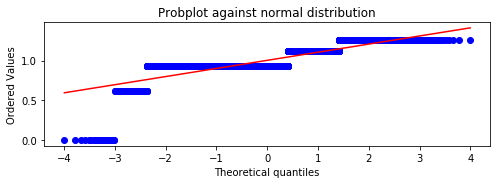

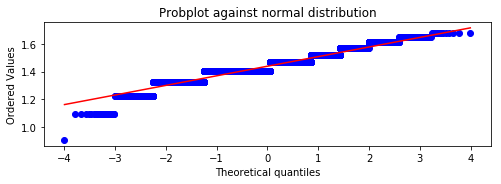

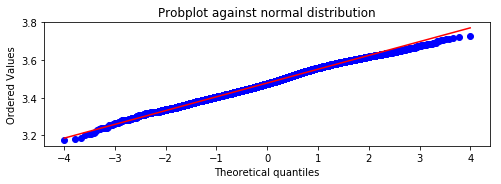

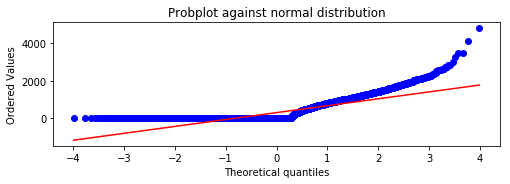

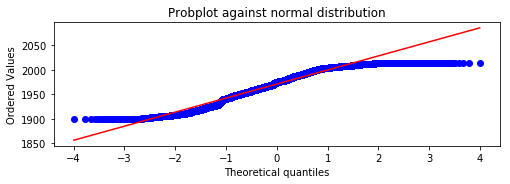

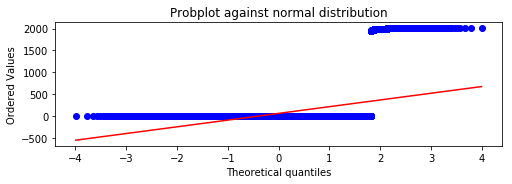

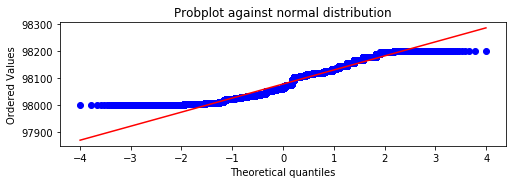

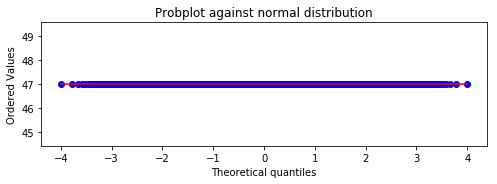

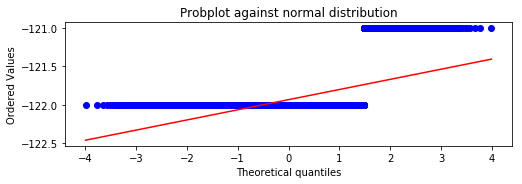

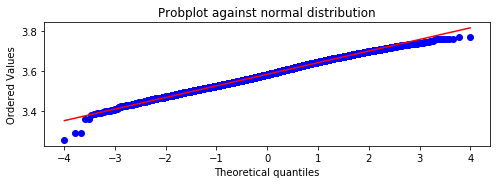

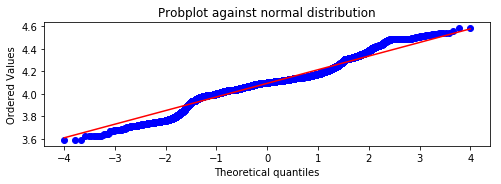

In [88]:
from scipy import stats

for x in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    print(x, 'QQ-plot')
    fig = plt.figure(figsize=(8, 5))
    ax1 = fig.add_subplot(211)
    x = df1[x]
    prob = stats.probplot(x, dist=stats.norm, plot=ax1)
    ax1.set_title('Probplot against normal distribution')



In [41]:
x=df

x_cols = sm.add_constant(x)

outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=df).fit()
model.summary()

C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     458.5
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:56:57   Log-Likelihood:            -2.8691e+05
No. Observations:               21420   AIC:                         5.742e+05
Df Residuals:                   21217   BIC:                         5.758e+05
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -4.22e+05   2.38e+04    -17.730      0.000   -4.69e+05   -3.75e+05
bedrooms      -2.666e+04   1556.092    -17.133      0.000   -2.97e+04   -2.36e+04
bathrooms      2.432e+04   1743.269     13.953      0.000    2.09e+04    2.77e+04
sqft_living     100.9463     14.383      7.018      0.000      72.754     129.138
sqft_lot          0.2378      0.038      6.201      0.000       0.163       0.313
floors        -4.903e+04   3325.314    -14.746      0.000   -5.56e+04   -4.25e+04
waterfront     5.932e+05   1.65e+04     35.858      0.000    5.61e+05    6.26e+05
view[0]        7.439e+04   9144.294      8.135      0.000    5.65e+04    9.23e+04
view[1]        6.845e+04   5583.307     12.260      0.000    5.75e+04    7.94e+04
view[2]        1.557e+05   7640.957     20.379      0.000    1.41e+05    1.71e+05
view[3]        3.327e+05   1.16e+04     28.790      0.000     3.1e+05    3.55e+05
condition       2.64e+04   1951.129     13.529      0.000    2.26e+04    3.02e+04
grade          6.162e+04   1853.895     33.239      0.000     5.8e+04    6.53e+04
sqft_above       98.4497     14.424      6.826      0.000      70.178     126.721
sqft_basement  1.256e+04   6280.706      2.000      0.046     251.395    2.49e+04
yr_built[0]   -8.615e+04   3.44e+04     -2.507      0.012   -1.54e+05   -1.88e+04
yr_built[1]   -7.256e+04   3.53e+04     -2.055      0.040   -1.42e+05   -3349.756
yr_built[2]   -5.082e+04   2.95e+04     -1.725      0.085   -1.09e+05    6925.647
yr_built[3]    3175.2388   2.97e+04      0.107      0.915    -5.5e+04    6.14e+04
yr_built[4]    3.095e+04   2.54e+04      1.218      0.223   -1.88e+04    8.07e+04
yr_built[5]   -1.118e+04   2.41e+04     -0.464      0.643   -5.84e+04    3.61e+04
yr_built[6]    9540.8603   2.63e+04      0.362      0.717   -4.21e+04    6.11e+04
yr_built[7]   -4.466e+04   2.45e+04     -1.825      0.068   -9.26e+04    3315.446
yr_built[8]    2352.5287   2.39e+04      0.098      0.922   -4.46e+04    4.93e+04
yr_built[9]    2.196e+04   2.23e+04      0.986      0.324   -2.17e+04    6.56e+04
yr_built[10]  -2540.4499   2.56e+04     -0.099      0.921   -5.28e+04    4.77e+04
yr_built[11]  -4350.3365   2.52e+04     -0.173      0.863   -5.37e+04     4.5e+04
yr_built[12]   4035.0090   2.74e+04      0.147      0.883   -4.97e+04    5.77e+04
yr_built[13]   -1.46e+04    2.8e+04     -0.522      0.602   -6.94e+04    4.02e+04
yr_built[14]  -1.581e+04   2.65e+04     -0.597      0.551   -6.77e+04    3.61e+04
yr_built[15]   6558.7478    2.5e+04      0.262      0.793   -4.25e+04    5.56e+04
yr_built[16]  -3798.0875   2.76e+04     -0.138      0.890   -5.78e+04    5.02e+04
yr_built[17]  -8234.3178   2.27e+04     -0.362      0.717   -5.28e+04    3.63e+04
yr_built[18]  -1.507e+04   2.43e+04     -0.619      0.536   -6.28e+04    3.26e+04
yr_built[19]   -771.7225   2.37e+04     -0.033   

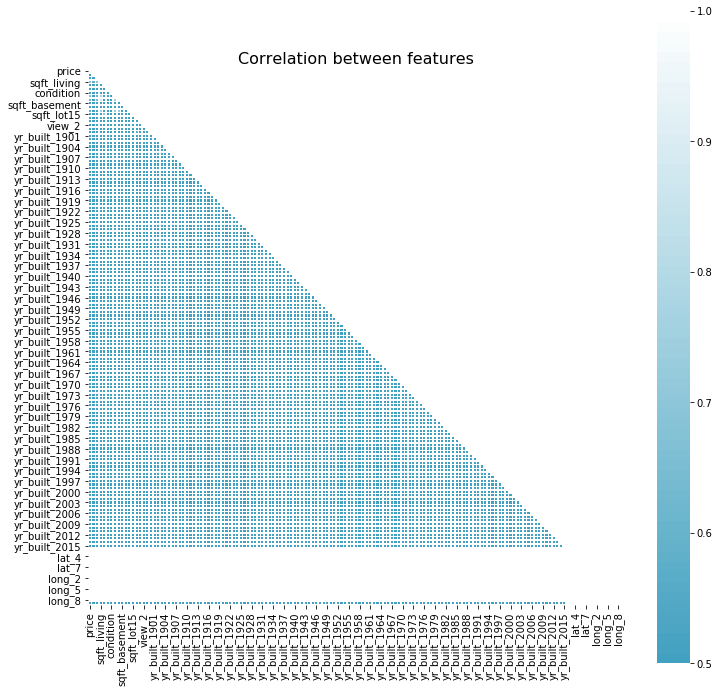

In [42]:
plt.figure(figsize=(12,12))
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='ocean')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.show()


In [17]:
print('mean of the price=', df.price.mean(), 'Standard Deviation=', df.price.std())
print(df.price.quantile([0.25,0.5,0.75]))


mean of the price= 540739.3039215687 Standard Deviation= 367931.10995284846
0.25    322500.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64


In [18]:
outlier = (1.5*(645000-322500))+645000
print('Max Price value =', outlier)


Max Price value = 1128750.0


In [20]:
print('mean of the price=', df.sqft_living.mean(), 'Standard Deviation=', df.sqft_living.std())
print(df.sqft_living.quantile([0.25,0.5,0.75]))

mean of the price= 1977.867531698653 Standard Deviation= 774.4505768223867
0.25    1400.0
0.50    1860.0
0.75    2440.0
Name: sqft_living, dtype: float64


In [21]:
outlier = (1.5*(2440-1400))+2440
print('Max sqft value =', outlier)



Max sqft value = 4000.0


In [22]:
df = df[df.sqft_living < 4000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19967 entries, 0 to 21596
Data columns (total 21 columns):
id               19967 non-null int64
date             19967 non-null datetime64[ns]
price            19967 non-null float64
bedrooms         19967 non-null int64
bathrooms        19967 non-null float64
sqft_living      19967 non-null int64
sqft_lot         19967 non-null int64
floors           19967 non-null float64
waterfront       19967 non-null float64
view             19967 non-null float64
condition        19967 non-null int64
grade            19967 non-null int64
sqft_above       19967 non-null int64
sqft_basement    19967 non-null float64
yr_built         19967 non-null int64
yr_renovated     19967 non-null float64
zipcode          19967 non-null int64
lat              19967 non-null float64
long             19967 non-null float64
sqft_living15    19967 non-null int64
sqft_lot15       19967 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.4

In [245]:
stats.shapiro(df.sqft_living)

C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9735862016677856, 0.0)